<a href="https://colab.research.google.com/github/kvik18/Hypotheses-AB-test/blob/main/AB_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Приоритезация гипотез. A/B тест.
### Описание проекта
Приоритизируйте гипотезы по увеличению выручки интернет-магазина. Запустите A/B-тест и проанализируйте результаты.
### Цель проекта
Увеличения выручки интернет-магазина.

# Часть 1. Приоритизация гипотез
### Описание данных 
Файл hypothesis.csv с 9 гипотезами по увеличению выручки интернет-магазина с параметрами Reach, Impact, Confidence, Effort.
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### План работы
1. Загрузка данных и подготовка их к анализу.
2. Применение методов ICE и RICE приоритизации гипотез.
3. Комментарии.

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Загрузка файла с гипотезами в переменную data, просмотр 
data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 120
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
# приведу названия столбцов всех таблиц к нижнему регистру и заменю пробелы подчеркиванием
data.columns = [x.lower() for x in data.columns.values]
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Задачи 
### Задача 
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

ICE и RICE — это популярные методы приоритизации задач. Аббревиатура включает следующие факторы для оценки:
- Reach — это охват;
- Impact — влияние;
- Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат;
- Effort — трудозатраты.  
Формулы: ICE SCORE = Impact * Confidence / Efforts;  
RICE SCORE = Reach * Impact * Confidence / Efforts

In [ ]:
# Формула фреймворка ICE: ICE SCORE = Impact * Confidence / Efforts
data['ICE'] = round(data['impact'] * data['confidence'] / data['efforts'], 2)
data[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 8, 0, 7.

### Задача
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [ ]:
# Формула фреймворка RICE: RICE SCORE = Reach * Impact * Confidence / Efforts
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'RICE', 'ICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6.

### Задача
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Точная оценка гипотезы зависит от метода. Потому нужно смотреть не на абсолютную оценку, а на место гипотезы среди остальных.

* Наиболее перспективная гипотеза по ICE - номер 8: "Запустить акцию, дающую скидку на товар в день рождения";
* Наиболее перспективная гипотеза по RICE - номер 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";  
Так получилось, потому что параметр Reach гипотезы 7 равен 10, в то время как у других гипотез он меньше.

# Часть 2. Анализ A/B-теста
Результаты A/B-теста описаны в файлах orders.csv и visitors.csv.
### Описание данных 
Файл orders.csv. 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.  

Файл visitors.csv. 
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

### План работы
1. Исследование кумулятивной конверсии, выручки и среднего чека по группам. 

1. Исследование стоимости и количества заказов по пользователям. Определение аномальных пользователей.

1. Подсчет статистической значимости различий в конверсии и среднем чеке между группами по «сырым» данным.

1. Подсчет статистической значимости различий в конверсии и среднем чеке между группами по «очищенным» данным.

1. Вывод по результатам теста.

In [ ]:
# прочту данные из файлов с результатами A/B-тестирования:
orders = pd.read_csv('/datasets/orders.csv')
# дата приведена к нужному виду методом dt.datetime.strptime(x, '%Y-%m-%d')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# общая информация о данных в файле orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
# подсчет пропусков
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
# подсчет дубликатов
orders.duplicated().sum()

0

In [ ]:
# прочту данные из файлов с результатами A/B-тестирования:
visitors = pd.read_csv('/datasets/visitors.csv')
# дата приведена к нужному виду методом dt.datetime.strptime(x, '%Y-%m-%d')
visitors['date'] = visitors['date'].map(
   lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# общая информация о данных в файле visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# подсчет пропусков
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
# подсчет дубликатов
visitors.duplicated().sum()

0

In [ ]:
# временной интервал теста
AB_first_date = visitors['date'].min()
AB_last_date = visitors['date'].max()
AB_first_date, AB_last_date

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [ ]:
# сколько групп учавствует в АВ-тесте
AB_groups = visitors['group'].unique()
AB_groups

array(['A', 'B'], dtype=object)

In [ ]:
# количество посетителей в каждой группе
AB_groups_v = visitors.groupby('group').agg({'visitors': 'sum'})
AB_groups_v

,visitors
group,
A,18736
B,18916


In [ ]:
# количество покупателей в каждой группе
AB_groups_n = orders.groupby('group').agg({'visitorId': 'nunique'})
AB_groups_n

,visitorId
group,
A,503
B,586


In [ ]:
# посмотрю, не попадают ли какие-то пользователи в обе группы
two_groups = orders.groupby('visitorId').agg({'group':'nunique'})
two_groups = two_groups.query('group > 1')
two_groups.shape[0]

58

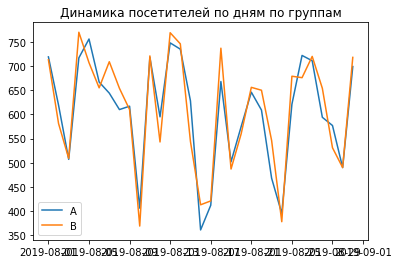

In [ ]:
# динамика посетителей сайта по дням по группам

# посетители группы А по дням теста
visitorsA = visitors[visitors['group']=='A'][['date','visitors']]
# посетители группы В по дням теста
visitorsB = visitors[visitors['group']=='B'][['date','visitors']]

# график посетителей группы А по дням теста
plt.plot(visitorsA['date'], visitorsA['visitors'], label='A')

# график посетителей группы В по дням теста
plt.plot(visitorsB['date'], visitorsB['visitors'], label='B')
plt.title('Динамика посетителей по дням по группам')
plt.legend() 
plt.show()

* Данные прочитаны, предобработаны, проверены на пропуски и дубликаты.  
* Тестирование проходило с 1 по 31 августа 2019 года.  
* В АВ-тесте участвовали две группы посетителей интернет-магазина: 18736 и 18916 человек.  
* Покупателями из них стали 503 и 589 человек соответственно.  
* 58 покупателей попали в обе группы теста.  
* Количество посетителей сайта обеих групп на протяжении тестового периода менялось одинаково.

## Задачи
Проанализируйте A/B-тест:
### Задача
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Соберу кумулятивные данные в датафрейм cumulativeData со столбцами:
*	date — дата;
*	group — группа A/B-теста (A или B);
*	orders — кумулятивное количество заказов на указанную дату в указанной группе;
*	buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
*	revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
*	visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [ ]:
# создам массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates().sort_values('date')
datesGroups

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A
...,...,...
497,2019-08-29,A
690,2019-08-30,B
730,2019-08-30,A
930,2019-08-31,B


In [ ]:
# Получу агрегированные кумулятивные по дням данные о заказах интернет-магазина.
# Вычислю максимальную дату и группу, чтобы столбец 'group' не пропал из итогового вывода.
# Найду число уникальных заказов и пользователей, сумму средних чеков.
ordersAggregated = datesGroups\
                  .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                  .agg({'date' : 'max', 
                        'group' : 'max', 
                        'transactionId' : 'nunique', 
                        'visitorId' : 'nunique', 
                        'revenue' : 'sum'}), axis=1)\
                  .sort_values(by=['date','group']) 


In [ ]:
# Получу агрегированные кумулятивные по дням данные о посетителях интернет-магазина
# Вычислю максимальную дату и количество посетителей.
visitorsAggregated = datesGroups\
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                     .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                     .sort_values(by=['date','group']) 

In [ ]:
# объединю кумулятивные данные в одной таблице и присвою ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [ ]:
# проверю, корректно ли был содан датафрейм cummulativeData, 
# совпадают ли его минимальная и максимальная даты с датами в исходных данных
cumulativeData['date'].min(), cumulativeData['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

 Даты совпадают, датафрейм cummulativeData был содан корректно.

Построю графики кумулятивной выручки по дням и группам A/B-тестирования.

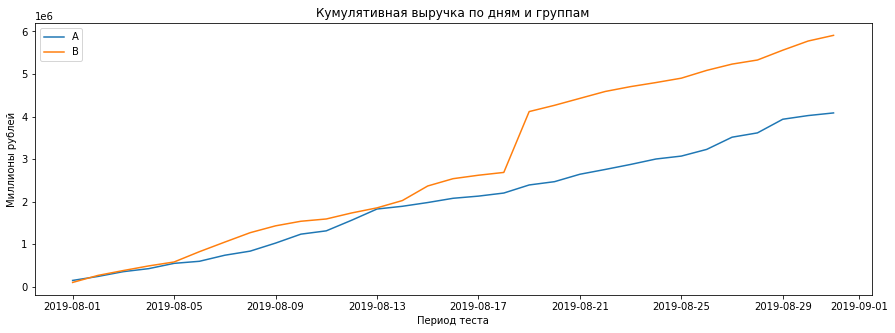

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Период теста')
plt.ylabel('Миллионы рублей')
plt.legend()
plt.title('Кумулятивная выручка по дням и группам')
plt.show()

* Выручка почти равномерно увеличивается в течение всего теста. 
* График выручки группы B в центральной точке резко растёт. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.


### Задача
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

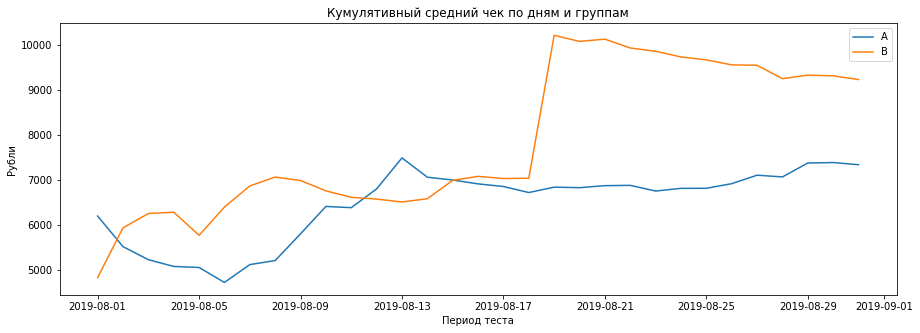

In [ ]:
# кумулятивный средний чек по группам: разделю кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Период теста')
plt.ylabel('Рубли')
plt.title('Кумулятивный средний чек по дням и группам')
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A и падает для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Задача
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [ ]:
# соберу данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA\
                         .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


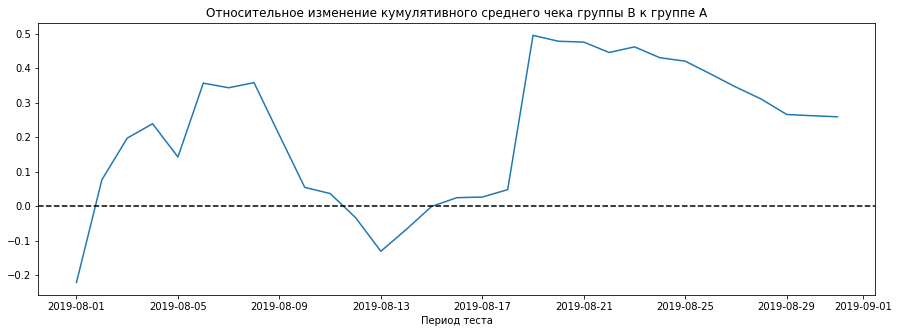

In [ ]:
# cтрою отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Период теста')
plt.show()

В нескольких точках график различия между сегментами резко меняется в несколько дат. Наверное, тогда были совершены аномальные заказы. В последние 10 дней кривая падает.

### Задача
Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [ ]:
# считаю кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяю данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяю данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

cumulativeDataA.head(5), cumulativeDataB.tail(5), cumulativeData['conversion'].min(), cumulativeData['conversion'].max()

(        date group  orders  buyers  revenue  visitors  conversion
 0 2019-08-01     A      24      20   148579       719    0.033380
 2 2019-08-02     A      44      38   242401      1338    0.032885
 4 2019-08-03     A      68      62   354874      1845    0.036856
 6 2019-08-04     A      84      77   425699      2562    0.032787
 8 2019-08-05     A     109     100   549917      3318    0.032851,
          date group  orders  buyers  revenue  visitors  conversion
 53 2019-08-27     B     548     504  5232260     16523    0.033166
 55 2019-08-28     B     576     526  5328268     17177    0.033533
 57 2019-08-29     B     596     544  5559398     17708    0.033657
 59 2019-08-30     B     620     567  5774631     18198    0.034070
 61 2019-08-31     B     640     586  5907760     18916    0.033834,
 0.029217427214536445,
 0.03685636856368564)

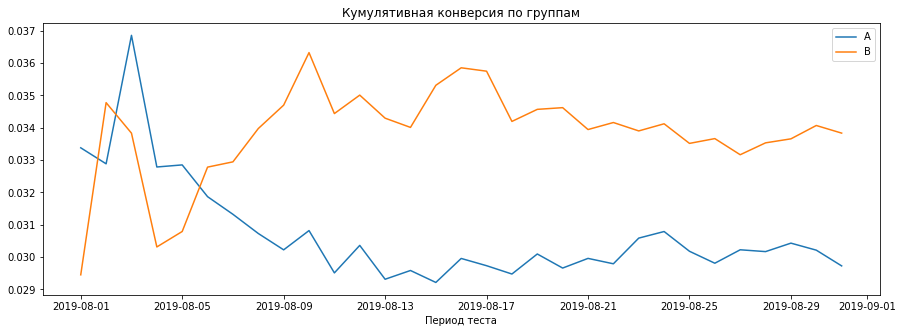

In [ ]:
# строю графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей:
# передам ему минимальное и максимальное значения оси x: '2019-08-01', '2019-08-31'; 
# минимальное и максимальное значения оси y: 0, 0.037:
#plt.axis(["2019-08-01", '2019-08-31', 0, 0.037])
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Период теста')
plt.show()

График получился симметричный. В начале теста сегмент A имел большую конверсию. Затем конверсия группы B выросла и зафиксировалась, а конверсия группы А упала и также зафиксировалась.

### Задача
Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

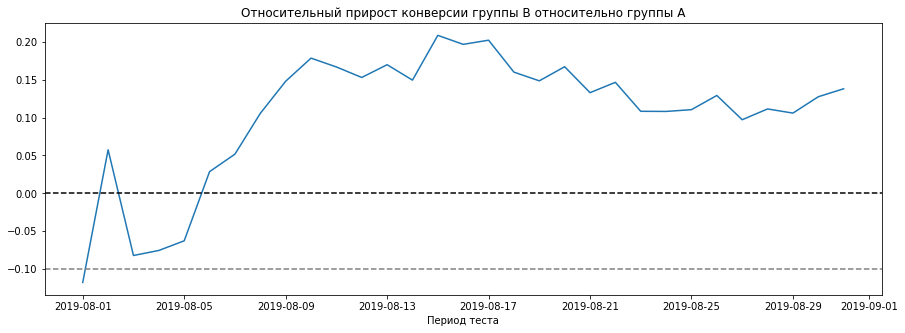

In [ ]:
# соберу данные по кумулятивной конверсии в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
        .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтрою относительный прирост кумулятивной конверсии
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1 
         )

# добавляю оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('Период теста')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя.

### Задача
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [ ]:
# данные о заказах
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# Посчитаю количество заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
# переименую колонки
ordersByUsers.columns = ['visitors', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitors,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


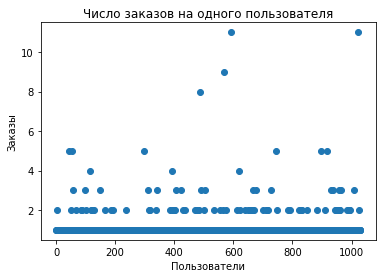

In [ ]:
# точечная диаграмма числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Число заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.show()

Большинство покупателей заказывали только один раз. Много пользователей с 2-3 заказами.

### Задача
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [ ]:
# для подсчёта перцентилей количества заказов на пользователя применю метод percentile() библиотеки Numpy
order_perc = np.percentile(ordersByUsers['orders'], [95, 99])
order_perc

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И не более 1% пользователей заказывали более четырех раз.
Выберу 4 заказа на одного пользователя за нижнюю границу числа заказов.

### Задача
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [ ]:
# стоимость самых дорогих заказов
orders['revenue'].sort_values(ascending=False).head(10)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
682       78990
662       78990
743       67990
1103      66350
1099      65710
Name: revenue, dtype: int64

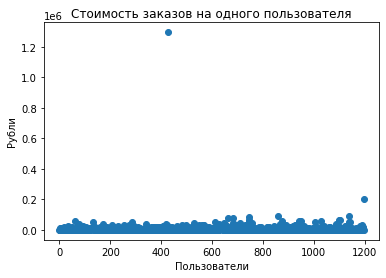

In [ ]:
# точечная диаграмма стоимости заказов на одного пользователя
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов на одного пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Рубли')
plt.show()

В данных есть заказ за 1294500 рублей и за 202740 рублей. Однако, большинство заказов не превышает 100000 рублей.

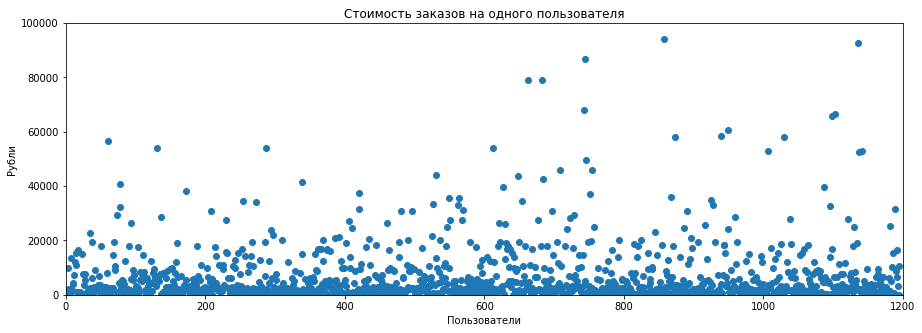

In [ ]:
# увеличу масштаб: изменю точечная диаграмма стоимости заказов на одного пользователя
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов на одного пользователя')
plt.axis([0, 1200, 0, 100000])
plt.xlabel('Пользователи')
plt.ylabel('Рубли')
plt.show()

### Задача
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [ ]:
# считаю перцентили стоимости заказов методом percentile() библиотеки Numpy
revenue_perc = np.percentile(orders['revenue'], [95, 99])
revenue_perc

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. 

Приму за аномальные - заказы дороже 58 233 рублей. Это - от 1% заказов.

### Задача
Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Подготовлю данные.

In [ ]:
# данные о посетителях
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
# посетители группы А 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head(5)

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [ ]:
# агрегированные кумулятивные по дням данные о посетителях группы A интернет-магазина
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head(5)

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [ ]:
# посетители группы B 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# агрегированные кумулятивные по дням данные о посетителях группы B интернет-магазина
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head(5)

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [ ]:
# данные о заказах
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
# заказы группы A 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# агрегированные кумулятивные по дням данные о заказах группы A интернет-магазина
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head(5)

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [ ]:
# заказы группы В 
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# агрегированные кумулятивные по дням данные о заказах группы В интернет-магазина
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head(5)

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [ ]:
# соберу данные в одном датафрейме
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаю статистическую значимость различия в конверсии между группами.
Создам переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов.

In [ ]:
# количество заказов для покупателей группы А интернет-магазина
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# количество заказов для покупателей группы В интернет-магазина
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head(5)

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявлю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. 

In [ ]:
# серия с количеством заказов покупателей из группы А, дополненная нулями до числа всех посетителей группы А
sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                  - len(ordersByUsersA['orders'])), name='orders')],axis=0)
# серия с количеством заказов покупателей из группы В, дополненная нулями до числа всех посетителей группы В
sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                                                  - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Чтобы получить конверсию в группе, поделю сумму заказов на число пользователей — найду среднее в выборке sampleA методом mean(). Аналогично найду конверсию группы B: SampleB.mean(). Выведу относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлю до трёх знаков после запятой.

In [ ]:
# число заказов на каждого пользователя группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# число заказов на каждого пользователя группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
# U-критерий Манна-Уитни
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост конверсии: 0.138


**Вывод:** p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаю. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия.

Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

### Задача
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Нулевая гипотеза:** различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [ ]:
# U-критерий Манна-Уитни
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительный прирост среднего чека: 0.259


P-value больше 0.05. Нулевую гипотезу о том, что в среднем чеке нет различий, не отвергаю. 

Поскольку относительное различие среднего чека между сегментами составляет 25,9%, наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

### Задача
Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Приму за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 30 000 рублей. Таким образом уберу 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Количество аномальных пользователей узнаю методом shape().


In [ ]:
# покупатели обеих групп, у которых более 4 заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= order_perc[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= order_perc[1]]['userId'],
    ],
    axis=0,
)
# покупатели обеих групп, истративших более 30000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_perc[1]]['visitorId']

# объединяю аномальных покупателей 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5), abnormalUsers.shape[0]

(1099    148427295
 18      199603092
 23      237748145
 949     887908475
 744     888512513
 dtype: int64,
 20)

Всего 20 аномальных пользователей.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
# очищу данные от аномальных покупателей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применю статистический критерий Манна-Уитни к полученным выборкам:

In [ ]:
# U-критерий Манна-Уитни
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.014
Относительный прирост конверсии: 0.151


Было: p-value = 0.017, Относительный прирост конверсии группы B к конверсии группы A = 13.8%.

Стало: p-value = 0.014, Относительный прирост конверсии группы B к конверсии группы A = 15.1%.

Результаты по конверсии для «очищенных данных» практически не изменились. То есть в конверсии между группами есть статистически значимые различия. 

### Задача
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [ ]:
# U-критерий Манна-Уитни
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.959
Относительный прирост среднего чека -0.014



Было: p-value = 0.729, Относительный прирост среднего чека группы B к среднему чеку A = 25,9%.

Стало: p-value = 0.959, Относительный прирост среднего чека группы B к среднему чеку группы A = -1,4%.

P-value увеличился и остался больше 0,05. В среднем чеке между группами нет статистически значимых различий. 
Разница между сегментами сократилась с 25,9% до -1,4%. То есть средний чек группы А стал незначительно выше среднего чека группы B.

### Задача
Примите решение по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Имеющиеся факты:
*	Есть статистически значимое различие по конверсии между группами по «сырым», и по данным после фильтрации аномалий;
*	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
*	График различия конверсии между группами сообщает, что в начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Относительный прирост конверсии группы B к конверсии группы A = 14.8%.
*	График различия среднего чека говорит о том, что результаты группы B ухудшаются последние 10 дней. 

Исходя из обнаруженных фактов, тест следует остановить, зафиксировав победу группы B.